(array([ 394.,  189.,  219.,  259.,  191., 1224.,  215.,  152.,  167.,
         456.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

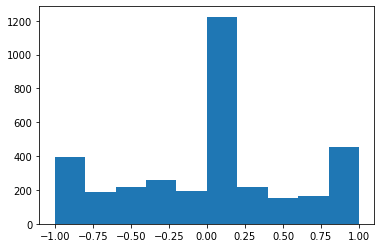

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import numpy as np 
from sklearn.model_selection import train_test_split
%matplotlib inline

IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS = 200, 66, 3
data_dir = 'dataset_track2'
data_df = pd.read_csv(os.path.join(os.getcwd(), data_dir, 'driving_log.csv'), 
                    names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

X = data_df[['center', 'left', 'right']].values
y = data_df['steering'].values
pos_zero = np.array(np.where(y==0)).reshape(-1, 1)

pos_none_zero = np.array(np.where(y!=0)).reshape(-1, 1)
np.random.shuffle(pos_zero)
pos_zero = pos_zero[:1000]
# join two numpy arrays
pos_combined = np.vstack((pos_zero, pos_none_zero))
pos_combined = list(pos_combined)
X = X[pos_combined].reshape(-1, 3)
y = y[pos_combined].reshape(-1)

plt.hist(y)

In [2]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
from keras.models import load_model 

model = load_model("savemodel.h5")


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
from keras.callbacks import ModelCheckpoint 
from keras.optimizers import Adam
from utils import batch_generator, INPUT_SHAPE

EPOCHS = 10
steps_per_epoch = 1000
batch_size = 32
# first - address we want model saved

checkpoint = ModelCheckpoint("models/savemodel.h5",
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto'
                            )
model.compile(loss="mean_squared_error", optimizer=Adam(lr=1e-4))
print(y_train.shape)
model.fit_generator(batch_generator(data_dir, X_train, y_train, batch_size, True),
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=batch_generator(data_dir, X_valid, y_valid, batch_size, False),
                    callbacks=[checkpoint],
                    validation_steps=len(X_valid), 
                    max_queue_size=1, 
                    verbose=1)




(2772,)
Epoch 1/10
1000/1000 [==============================] - 401s 401ms/step - loss: 0.2116 - val_loss: 0.1393
Epoch 2/10
1000/1000 [==============================] - 296s 296ms/step - loss: 0.1854 - val_loss: 0.1691
Epoch 3/10
1000/1000 [==============================] - 233s 233ms/step - loss: 0.1821 - val_loss: 0.2006
Epoch 4/10
1000/1000 [==============================] - 510s 510ms/step - loss: 0.1755 - val_loss: 0.1507
Epoch 5/10
1000/1000 [==============================] - 485s 485ms/step - loss: 0.1706 - val_loss: 0.1180
Epoch 6/10
1000/1000 [==============================] - 287s 287ms/step - loss: 0.1693 - val_loss: 0.1215
Epoch 7/10
1000/1000 [==============================] - 242s 242ms/step - loss: 0.1661 - val_loss: 0.2022
Epoch 8/10
1000/1000 [==============================] - 233s 233ms/step - loss: 0.1618 - val_loss: 0.1696
Epoch 9/10
1000/1000 [==============================] - 230s 230ms/step - loss: 0.1610 - val_loss: 0.1817
Epoch 10/10
1000/1000 [===============